<a href="https://colab.research.google.com/github/futureCodersSE/python-programming-for-data/blob/main/Worksheets/Opening_and_saving_files_locally_and_on_Google_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Google Drive for storing data files
We are increasingly working exclusively online and so file storage is no longer something we manage on the hard drive of the device we are using, it is stored in the cloud.

There are a number of different cloud storage providers:  Google Drive, AWS S3, OneDrive, Dropbox, Github, etc

Each handles files differently and differently Python libraries may be needed.

The exercises and examples below use Google Drive, as Google Colabs are stored on your Google Drive and so it is good to store data files there as well.

## Getting ready
---
\
1.  Login to your Google account and open Google Drive (https://drive.google.com)
2.  If your files are not showing as a list, click on the View icon (shown in the screenshot below) to get a list view (this is just because it is a bit easier to see things in a list than when they are shown as big icons and you have to scroll around.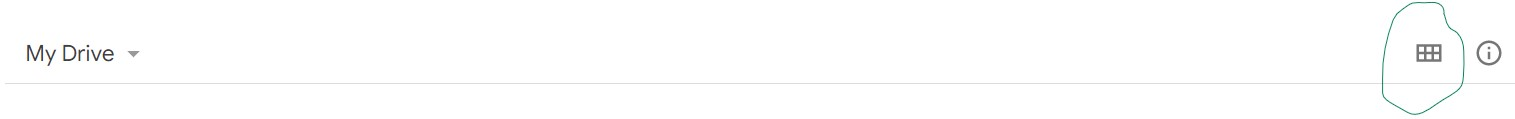

3.  Create a new folder (Click on the New button at the top left-hand side of the window and then select **New Folder**
4.  Name the folder **Colab_data**

Now you have a folder to store the datasets you want to work with.

## Mounting and unmounting the Google Drive
In order to be able to open and save files on Google Drive, with Python, you first need to mount the Drive.

When you have finished working with the files, you should always unmount the Drive.

Run the code below to see what mounting the drive looks like.  You will be asked to grant access to your Google Drive, which you should do.

In [ ]:
from google.colab import drive

def mount_drive():
  drive.mount('/content/drive', force_remount=True)
  folder_name = "/content/drive/MyDrive/Colab_data"
  return folder_name

data_folder = mount_drive()
print(data_folder)

Then run the code below to see what unmounting the drive looks like.

Once the drive is unmounted you will no longer be able to open and save files, without mounting it again.

In [ ]:
def unmount_drive():
  drive.flush_and_unmount()
  print('All changes made in this colab session should now be visible in Drive.')

unmount_drive()

## Opening a file from your Colab_data folder on your drive
---
\
You can use the standard file opening functions with pandas, or with requests.get() to open the data files.

To get ready to try it out, you will need a data file in your folder.  Download this file: https://drive.google.com/file/d/1rQ1GPIbk-qDkm8tU3_seTqpaxSSf-u8k/view?usp=share_link and then upload it to your Colab_data folder on your Google Drive

Run the code below to see how you might open a CSV file with Python pandas

In [ ]:
import pandas as pd
from google.colab import drive

def mount_drive():
  drive.mount('/content/drive', force_remount=True)
  folderpath = "/content/drive/MyDrive/Colab_data"
  return folderpath

def get_data(path):
  try:
    df = pd.read_csv(path + "/Paisley-Weather-Data.csv")
    return df
  except:
    print("There was a problem and the file could not be opened.")

path = mount_drive()
weather_df = get_data(path)
display(weather_df)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

If this file was an Excel file, you would use `pd.read_excel(path, sheet_name="")`  if it was a json data file, you would use `pd.read_json(path)`.

To try the code in the cell below, first download the JSON file at this link: https://drive.google.com/file/d/1hSp8nn-uVo6qjaHUJLBRpRMaM1qu1U8k/view?usp=share_link and upload it to your Colab_data folder.

In [ ]:
import json

def get_data(path):
  try:
    data = pd.read_json(path + "/busdata_23-01-04_22-00.json")
    return data
  except:
    print("There was a problem and the file could not be opened.")

path = mount_drive()
json_df = get_data(path)
display(json_df)

## Saving files in CSV format
---
\
Once you have cleaned a data file, or wrangled it in some way, you may want to save it so that it can be used later with another tool (maybe save it so that it can be opened in Excel or Google Sheets.

Before you can save, you will need to have mounted the drive (as long as you have run this already in this notebook, it will remember it is mounted).

Then you can use `df.to_csv(path + "/file_name.csv")` to save it as a CSV file.

**Try it out**
Run the code below to save the weather data (which was called `opened_df`) that you opened from the Paisley-weather-data.csv file earlier in this worksheet.

The code will save a copy of the file as `updated-Paisley-weather-data.csv`.

Once the code has run, check your Colab_data folder in your Google Drive.  The file should be there.

In [ ]:
def save_data(df, path):
  try:
    df.to_excel(path + "/updated-Paisley-weather-data.xlsx")
    print("File saved successfully")
  except:
    print("There was an error when trying to save the file.")

save_data(weather_df, path)

To do the same thing for saving an Excel file, use the instruction:

`df.to_excel(path + "\updated-weather-data.xlsx', index=False)`

# And finally...
---
\
Unmount the drive when you have finished with the files.  This way you keep it safe from corruption.

See the first code cell for how to do this.

# Opening and saving local files
---
\
To open files from your local hard drive, you will need first to upload the file to Google Drive, then you can access it from the upload list.

Make sure that you have the two files from above on your hard drive:  
*  Paisley-weather-data.csv (from https://drive.google.com/file/d/1rQ1GPIbk-qDkm8tU3_seTqpaxSSf-u8k/view?usp=share_link)  
  
*  busdata_23-01-04_22-00.json (from  https://drive.google.com/file/d/1hSp8nn-uVo6qjaHUJLBRpRMaM1qu1U8k/view?usp=share_link


Run the code below to see how this works.  When asked, upload the `Paisley-weather-data.csv` file:

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Paisley-Weather-Data.csv']))
display(df)

### To download a dataframe in a CSV or Excel file
---
\
Assuming that you have a dataframe that you need to save for later access, you can download it to your hard drive using the instructions:
```
df.to_csv('new_Paisley-Weather-Data.csv')
files.download('new_Paisley-Weather-Data.csv')
```

To download to an Excel spreadsheet:
```
df.to_excel('new_Paisley-Weather-Data.xlsx')
files.download('new_Paisley-Weather-Data.xlsx')
```
Try it out

In [13]:
from google.colab import files
import pandas as pd

def save_to_excel(df, filename):
  df.to_excel('new_Paisley-Weather-Data.xlsx')
  files.download('new_Paisley-Weather-Data.xlsx')

save_to_excel(df, 'new_Paisley-Weather-Data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Use the code cell below to try opening and saving files
---
